# Assignment 2
**Main Task** : We are given California housing data, We have to analyze the data thoroughly and create Multiple linear regression model to predict housing prices of locality.

**Task 1** : Load the California Housing dataset from sklearn.datasets.Use pandas library.Deliverables:
- Shape of dataset
- Column names
- First 10 rows

Due to network restrictions preventing sklearn from downloading the dataset, the California Housing dataset was loaded locally as housing.csv obtained from kaggle using pandas.


In [151]:
# Importing the essential libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso

# import sklearn
# print(sklearn.__version__) - did to check version of sklearn

# load dataset
# housing = fetch_california_housing(as_frame=True)


# loading the dataset housing.csv obtained from kaggle, had to use this backup option as sklearn.datasets had network restrictions
df = pd.read_csv("housing.csv")

print(df.shape) #prints the shape of dataset as (row,columns)
print(df.columns) #this is essentially used to print the column names in the table
print(df.head(10)) #print the first 10 rows 




(20640, 10)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84      

**Task 2**
- Use .describe() , .info() for understanding data
- Which feature has largest variance?

In [152]:
df.info() # .info() gives summary of the DataFrame's structure
df.describe() # .describe() generates descriptive statistical summaries
df.var(numeric_only=True).sort_values(ascending=False)
#Above line sorts the variance for df columns in descending order(ascending=False) 
#numeric_only=True makes sure numeric columns are used for variance calculations


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


median_house_value    1.331615e+10
total_rooms           4.759445e+06
population            1.282470e+06
total_bedrooms        1.775654e+05
households            1.461760e+05
housing_median_age    1.583963e+02
latitude              4.562293e+00
longitude             4.014139e+00
median_income         3.609323e+00
dtype: float64

# Task 3 : Univariate Analysis
- Plot histograms for all numeric columns with proper labelling of axis.
    - Try : different bins
    - Explain most widely used methods to eliminate skewness of column features in comments.
- Use Box plot for each feature to detect outliers in MedIncAveRooms, Population
- Correlation Heatmap : Compute correlation matrix, Plot a heatmap 

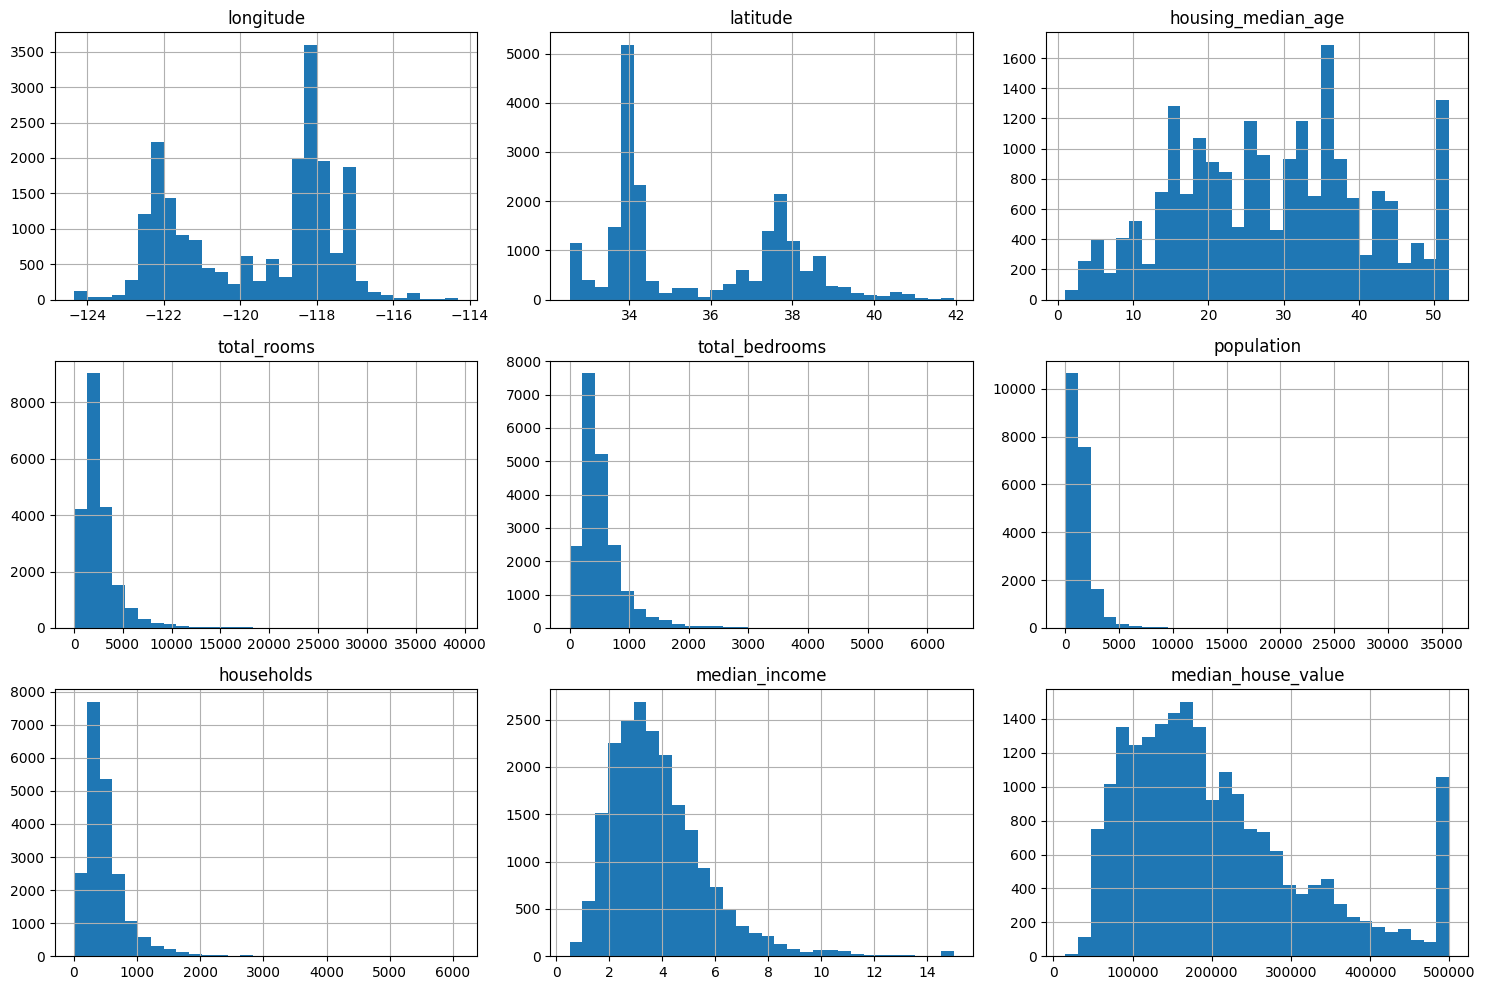

In [153]:
df.hist(bins=30, figsize=(15,10))
# df.hist(bins=10, figsize=(15,10))
# df.hist(bins=50, figsize=(15,10))
# df.hist(bins=100, figsize=(15,10)) diff bins were tried, 30 seems good in general
# X-axis = that column’s values ; Y-axis = number of values in that value range
# Non numeric column ocean_proximity has been excluded by default
plt.tight_layout()
plt.show()


# To remove skewness methods like Log Transformation, Square-root Transformation, Box-cox transformation are used. 
# These compress large values and stabilize variance.
# To handle extreme values simple methods like filtering (to remove outliers) and winsorization (setting a cap) can be used.


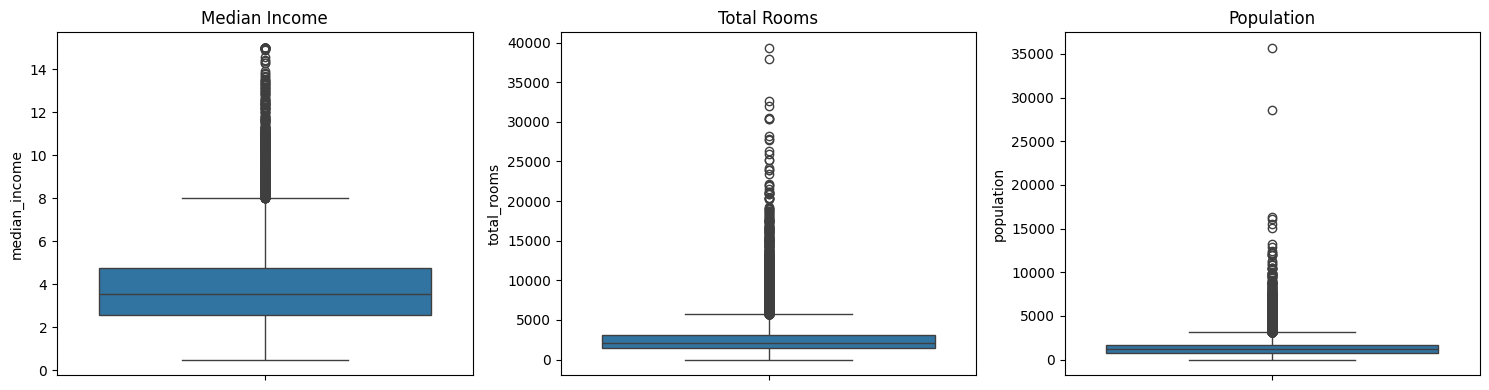

In [154]:
plt.figure(figsize=(15,4)) # Creates a wide figure to place multiple plots

plt.subplot(1,3,1) # 1 row, 3 plots, plot no. 1
sns.boxplot(y=df["median_income"])
plt.title("Median Income")

plt.subplot(1,3,2) # 1 row, 3 plots, plot no. 2
sns.boxplot(y=df["total_rooms"])
plt.title("Total Rooms")

plt.subplot(1,3,3) # 1 row, 3 plots, plot no. 3
sns.boxplot(y=df["population"])
plt.title("Population")

plt.tight_layout()
plt.show()


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

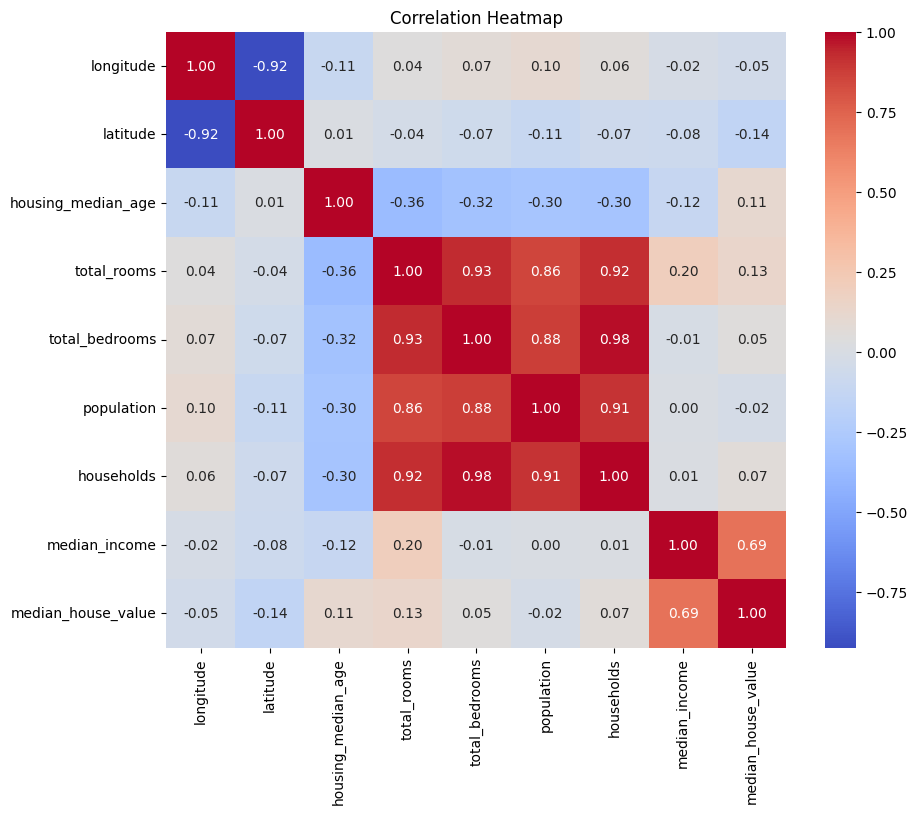

In [155]:
plt.figure(figsize=(10,8)) # space for heatmap plot
corr = df.corr(numeric_only=True) #numerical col only
print(corr) #correlation matrix printed

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f") # annot shows no. inside cells, fmt rounds off to 2 places
plt.title("Correlation Heatmap")
plt.show()


# Task 4 : Latitude/Longitude Visualization
**Scatter plot** :
- Longitude vs Latitude
- Color (cmap) by MedHouseVal
- Point size based on Population


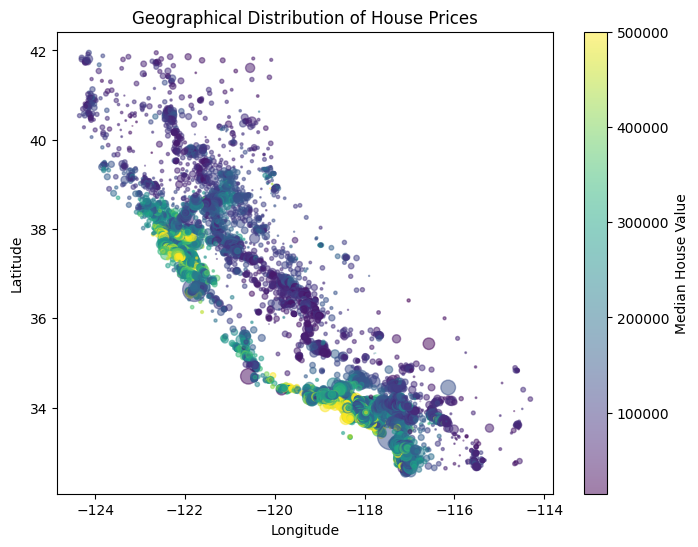

In [156]:
plt.figure(figsize=(8,6)) # new figure for placing scatter plot with width 8 and ht 6
plt.scatter(
    df["longitude"], #x axis
    df["latitude"], #y axis
    c=df["median_house_value"], # colors printed to be based on med housing prices
    s=df["population"]/100, # marker size by population, division 100 to avoid oversized points
    cmap="viridis", # defines color map array
    alpha=0.5 # transparency, useful for overlapping points
)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of House Prices")
plt.show()



# Task 5 : PCA, Regression, Model evaluation

- Explain why scaling is required before PCA??

- Apply PCA on features
    - Plot explained variance ratio
    - Choose top 2 principal components
    - Scatter plot:PC1 vs PC2
    - Color points by MedHouseVal

- Create a scikit-learn Pipeline for multiple linear regression and print coefficients- intercept matrix (exclude latitude and longitude in this final model becoz that is not relevant data : use correlation matrix to prove this point also)

- Evaluate model on metrics of MSE loss, MAE loss, R2 score , adjusted R2 score. Is high R2 score always good? Is low training loss always preferred?

- Plot:
    - Predicted vs Actual
    - Residuals vs Predicted values






## Why scale before PCA  
PCA works by finding new axes (principal components) that capture the maximum variance in the data. Features with large numerical ranges (like median_house_value above) naturally have much larger variances than features with small ranges (like median_house_value above). I have shown this above by df.var(). This introduces an scale bias which makes high variance features dominate and hence results are distorted based on units or values and true relationship between features is not displayed.

In [157]:
num_features = df.select_dtypes(include=np.number).drop("median_house_value", axis=1) # drops the target column median_house_value
num_features.isnull().sum() # to find missing values as PCA won't work with missing values
# applying PCA earlier was resulting in errors hence i am using Imputer provided by sklearn which essentially is filling NaN values with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(num_features)
scaler = StandardScaler() # scalar object to scale col
X_scaled = scaler.fit_transform(X_imputed) # scaled val = (old val - mean)/std_dev

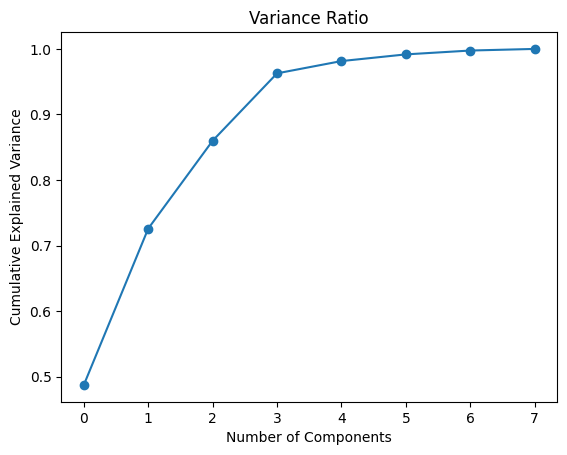

In [158]:
pca = PCA()
pca.fit(X_scaled) # Applying PCA to the scaled data

#variance  ratio to show fraction of total variance explained by each PC
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components") 
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Ratio")
plt.show()

#A small number of components explains most of the variance, indicating redundancy among original features. Hence we used PCA


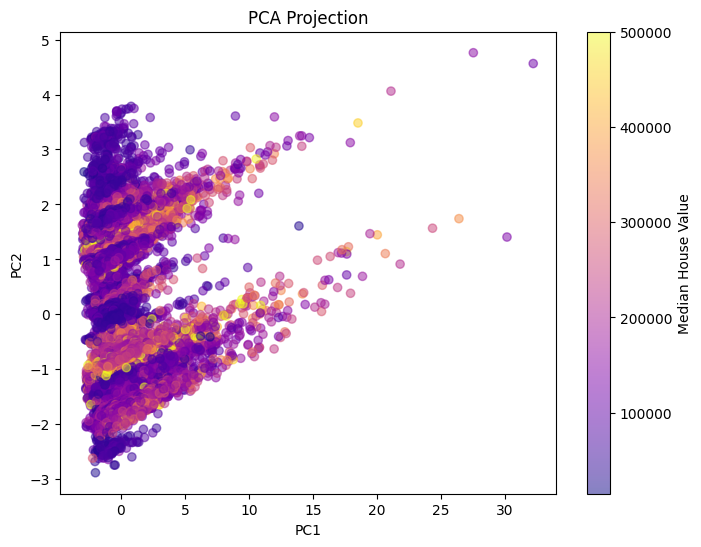

In [159]:
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled) #choosing top two principal components

plt.figure(figsize=(8,6)) #new figure to place plot 
plt.scatter(X_pca[:,0], X_pca[:,1],c=df["median_house_value"],cmap="plasma", alpha=0.5) #scatter plot setup
plt.colorbar(label="Median House Value")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()


In [160]:
#Latitude and longitude were excluded based on weak linear correlation although there are other features with lesser correlation in heatmap but it is advised to drop these
X_pca = df.drop(["median_house_value", "latitude", "longitude", "ocean_proximity"],axis=1) 
y = df["median_house_value"] #target column

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42) # test train split, 80% train and rest split

#A pipeline ensures consistent preprocessing during training and testing.
pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler()),("reg", LinearRegression())]) 

pipeline.fit(X_train, y_train) #Learns coefficients minimizing squared error

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

In [161]:
# coeff and intercepts
coefficients = pipeline.named_steps["reg"].coef_ 
intercept = pipeline.named_steps["reg"].intercept_

pd.DataFrame({"Feature": X_pca.columns,"Coefficient": coefficients})
# print(intercept) #to check intercept


,Feature,Coefficient
0,housing_median_age,23906.195203
1,total_rooms,-43497.748845
2,total_bedrooms,42713.178828
3,population,-40536.871604
4,households,48392.878111
5,median_income,91325.092200


In [162]:
#Evaluation Metrics

y_pred = pipeline.predict(X_test) # Predicts the target variable for the test set

mse = mean_squared_error(y_test, y_pred) #mean squared error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
r2 = r2_score(y_test, y_pred) #R^2

n = X_test.shape[0] # The number of samples in the test set (X_test)
p = X_test.shape[1] # The number of features (columns) in the test set (X_test)
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1) # Computes the Adjusted R-squared

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 5968652406.215663
MAE: 56713.52670401351
R2: 0.5445198785017472
Adjusted R2: 0.5438567188975275


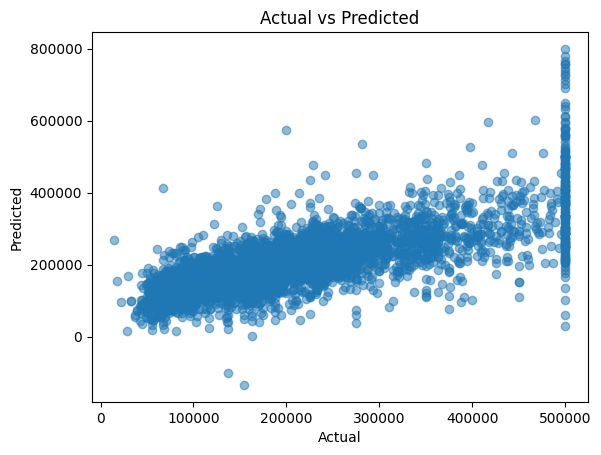

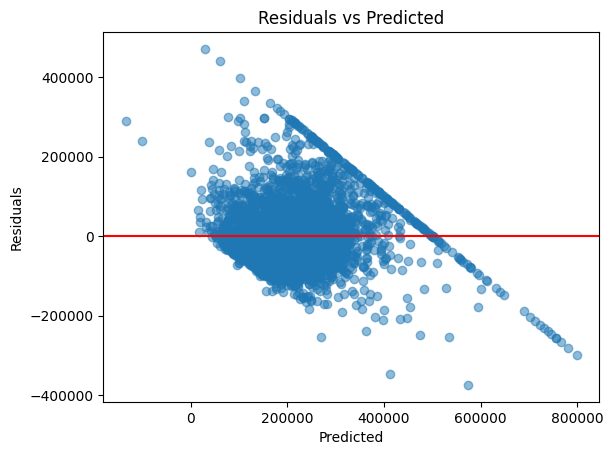

In [163]:
#Actual vs predicted plot to check overall results and fit
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

#residuals vs predicted value to check non linearity etc
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


## Is high R² always good?
No. A high R² may result from overfitting and does not guarantee to be accurate.

## Is low training loss always preferred?
No. Extremely low training loss may indicate memorization rather than learning.

# Bonus Tasks
Train Ridge & Lasso Regression and explain them with diagrams

In [ ]:
ridge_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler()),("ridge", Ridge(alpha=1.0))]) #pipeline creation for ridge

ridge_pipeline.fit(X_train, y_train) #Fitting ridge pipeline

pd.DataFrame({"Feature": X_pca.columns,"Ridge Coefficient": ridge_pipeline.named_steps["ridge"].coef_}) #coeff for various columns


,Feature,Ridge Coefficient
0,housing_median_age,23906.138608
1,total_rooms,-43435.982273
2,total_bedrooms,42670.898067
3,population,-40519.136862
4,households,48358.657249
5,median_income,91307.286845


In [ ]:
y_pred_ridge = ridge_pipeline.predict(X_test) #predicting target variable

print("Ridge R2:", r2_score(y_test, y_pred_ridge)) #r2
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge)) #mse


Ridge R2: 0.5445369435397429
Ridge MSE: 5968428784.425628


In [ ]:
lasso_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler()),("lasso", Lasso(alpha=0.01))]) #lasso pipeline creation

lasso_pipeline.fit(X_train, y_train) #fitting lasso pipeline

pd.DataFrame({"Feature": X_pca.columns,"Lasso Coefficient": lasso_pipeline.named_steps["lasso"].coef_}) #coeff for col


,Feature,Lasso Coefficient
0,housing_median_age,23906.189796
1,total_rooms,-43497.544842
2,total_bedrooms,42713.018245
3,population,-40536.800840
4,households,48392.772547
5,median_income,91325.040684


In [ ]:
y_pred_lasso = lasso_pipeline.predict(X_test) #predicting target variable

print("Lasso R2:", r2_score(y_test, y_pred_lasso)) #r2
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso)) #mse


Lasso R2: 0.5445199415067266
Lasso MSE: 5968651580.592758
